In [1]:
import gym
import tensorflow as tf
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from rl_utils import load_expert_policy, SupervisedPolicy, run_rollouts

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=25)
    display(display_animation(anim, default_mode='loop'))

Using TensorFlow backend.


In [2]:
env, pi_expert = load_expert_policy('roboschool-cheetah')
print(env.observation_space.shape)
print(env.action_space.shape)
frames = []

obs = env.reset()
# print(obs)
# print(obs.shape)
for i in range(60):
    a = pi_expert.act(obs)
    obs, r, done, _ = env.step(a)
    frames.append(env.render(mode = 'rgb_array'))

loaded :3
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: Environment '<class 'roboschool.gym_mujoco_walkers.RoboschoolHalfCheetah'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.
(26,)
(6,)
[-0.3349162   0.         -0.12587287  0.         -0.42095742  0.
  0.3465875   0.          0.07768851  0.          1.1882237   0.        ]
[-0.28192517  0.40329856 -0.16245185 -0.28053728 -0.5482516  -0.7287961
  0.36404002  0.19358781  0.0906968   0.14669786  1.1882237   0.        ]
[-0.1942377   0.426536   -0.18902269 -0.03599096 -0.82988435 -1.180259
  0.4180739   0.485313    0.09268598 -0.06453671  1.1882237   0.        ]
[-1.24566026e-01  2.72399902e-01 -1.58687472e-01  1.22267559e-01
 -1.07701731e+00 -1.36066490e-07

[-1.0062315   0.02964714  0.23770185 -0.38165438 -0.4189309  -0.84693396
  0.42297375 -0.11734931  1.0105196  -0.0733194   0.93170893  1.4267477 ]
[-0.9877572   0.11889669  0.19588646 -0.08660458 -0.75887734 -1.444957
  0.47029573  0.4546505   0.891419   -0.917558    1.0326408   0.        ]
[-0.96986645  0.04169578  0.18630846 -0.11454544 -1.0167955   0.0603107
  0.6004657   1.1284995   0.62270683 -2.3897815   1.0326408   0.        ]
[-0.9644116   0.02108266  0.18846618  0.08620152 -1.0068796   0.02470299
  0.7567814   1.058982    0.30176163 -2.1255674   1.0326415   0.        ]
[-0.9603308   0.02295064  0.23384818  0.29319432 -1.0028179   0.01011869
  0.9116764   1.0903428   0.00850591 -1.9829216   1.0142615  -0.25733143]
[-0.9312761   0.34239256  0.30724168  0.27961224 -1.0011542   0.00414461
  1.0137904  -0.09612075 -0.17883043 -0.12396139  0.97706354 -0.46689805]
[-0.85143745  0.40724412  0.38625968  0.43190235 -1.000473    0.00169671
  1.0056485  -0.03936856 -0.22181205 -0.39814463


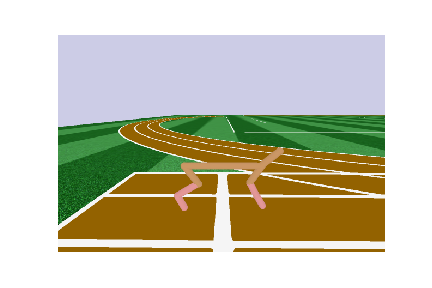
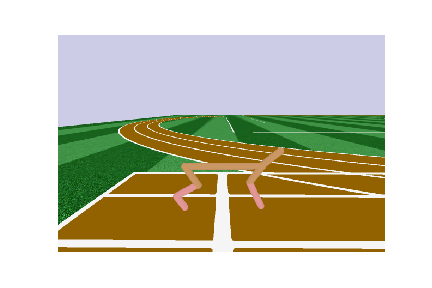
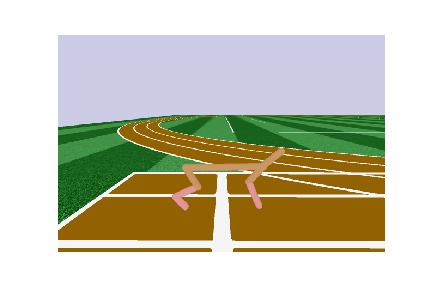
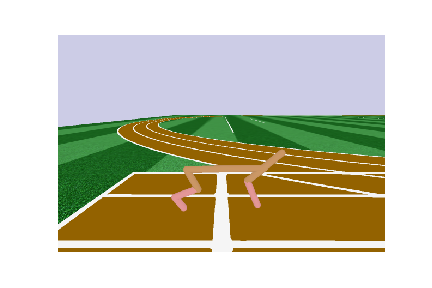
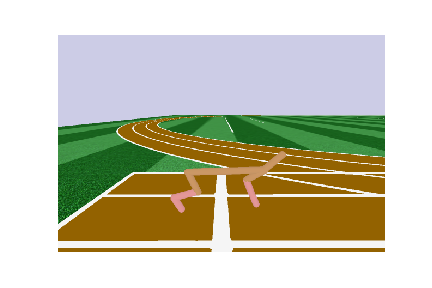
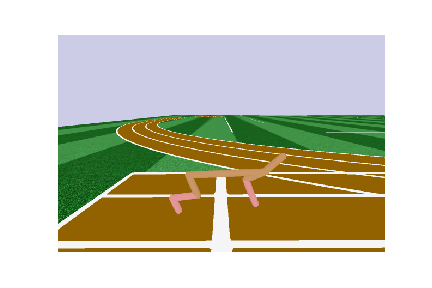
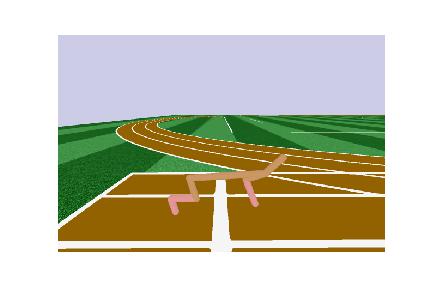
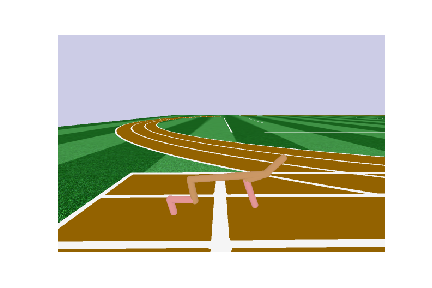
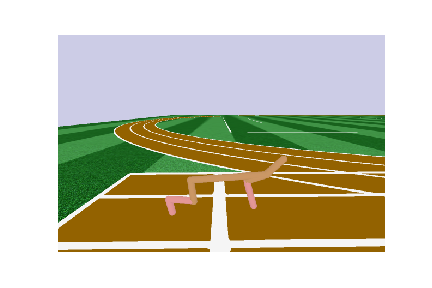
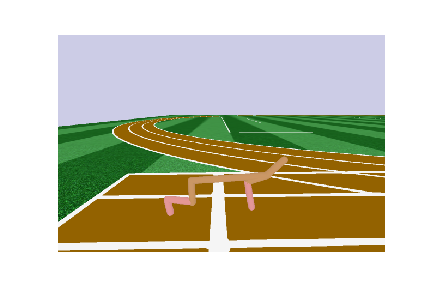
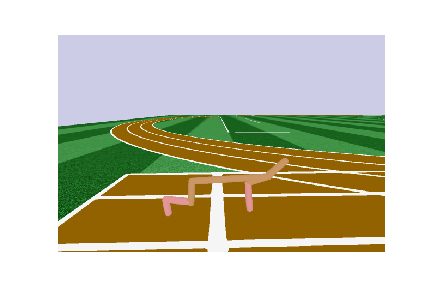
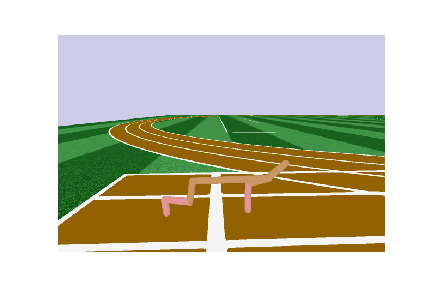
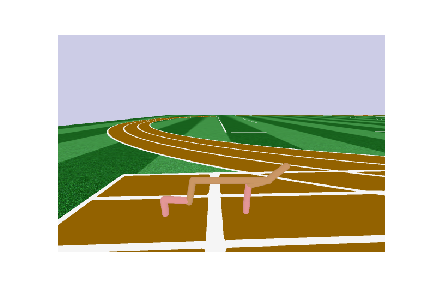
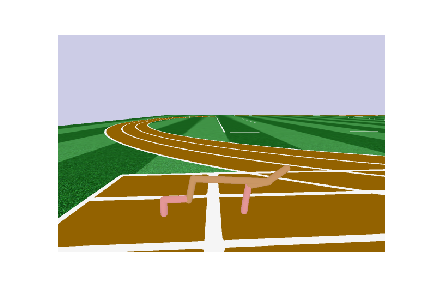
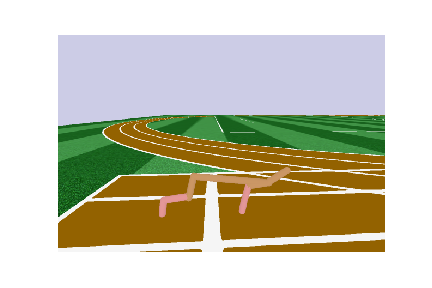
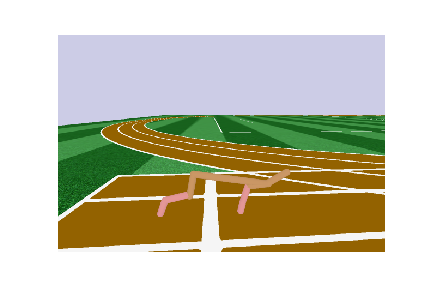
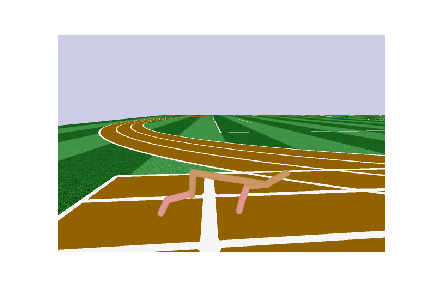
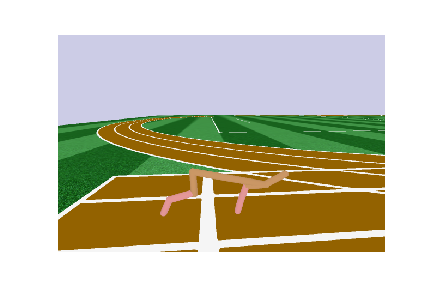
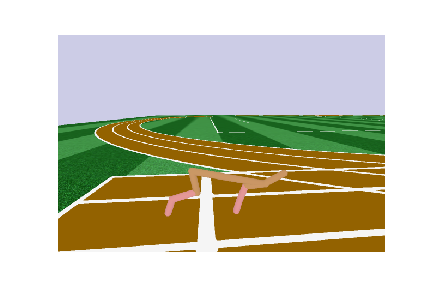
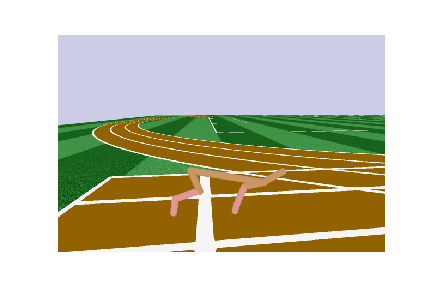
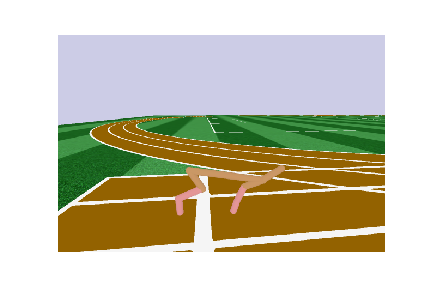
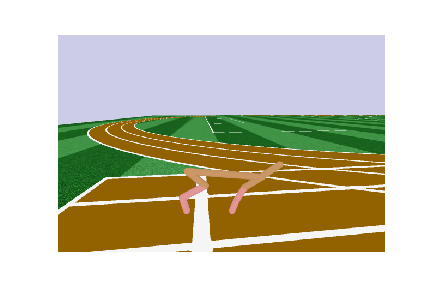
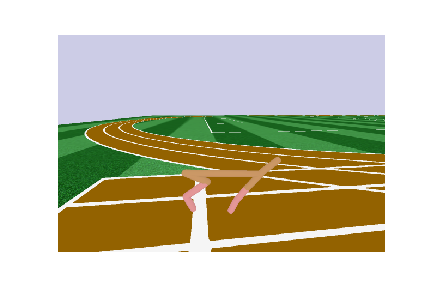
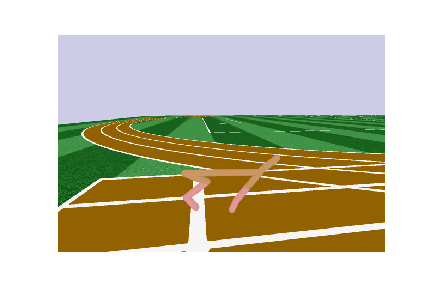
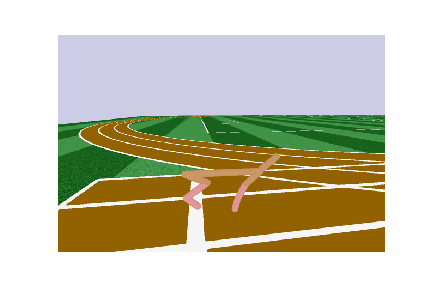
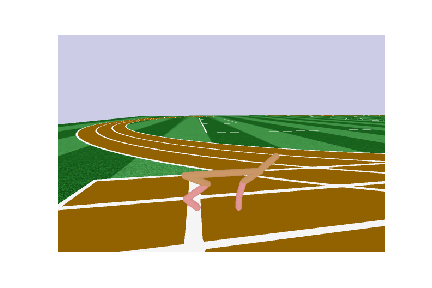
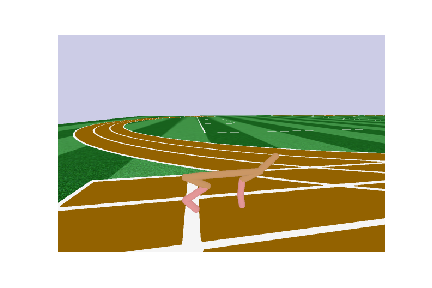
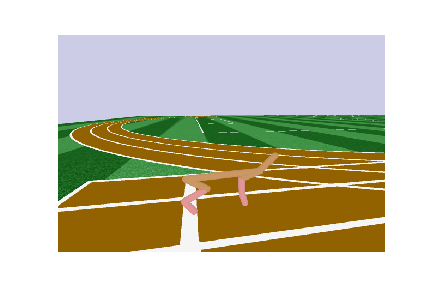
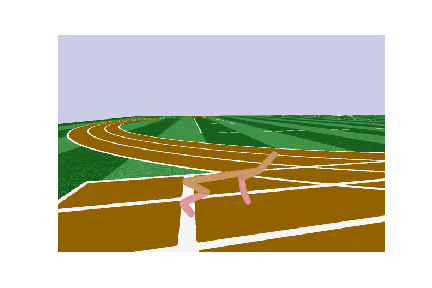
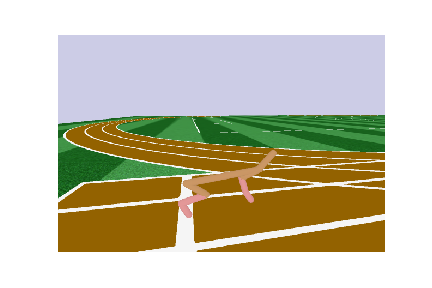
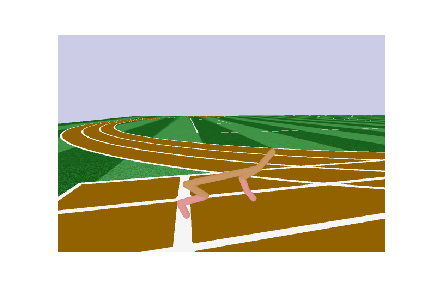
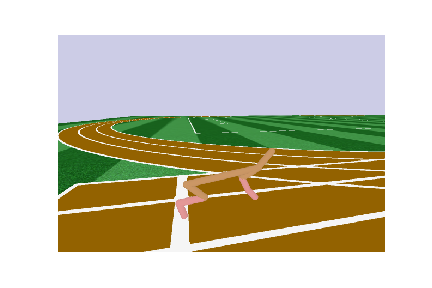
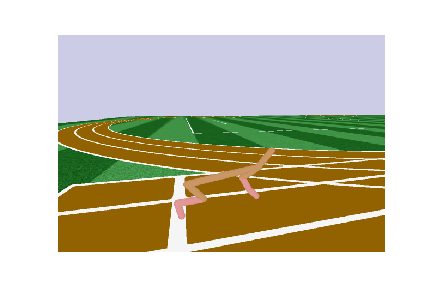
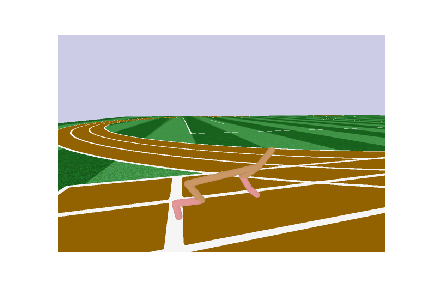
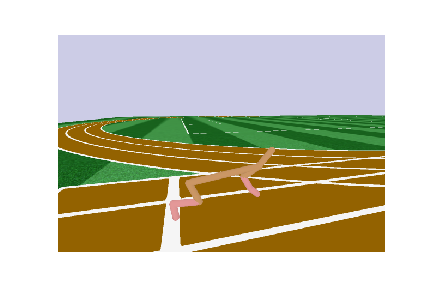
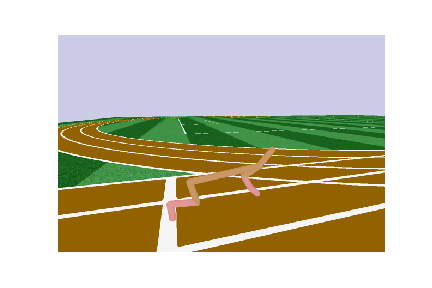
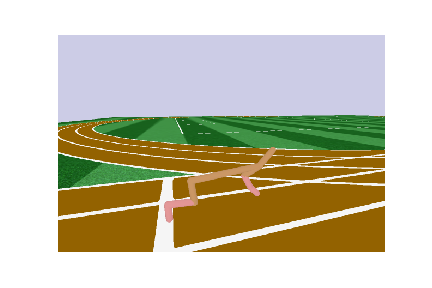
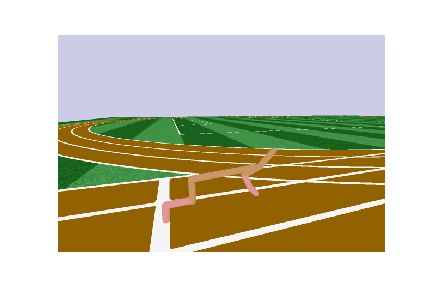
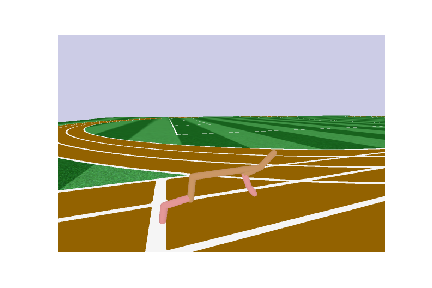
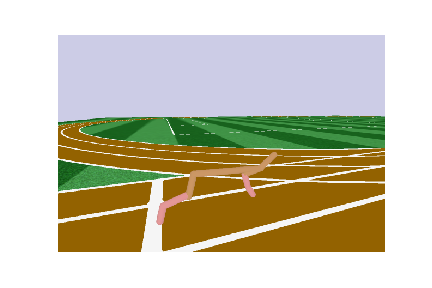
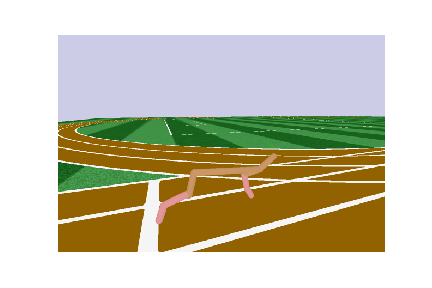
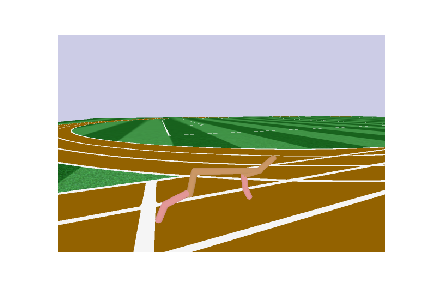
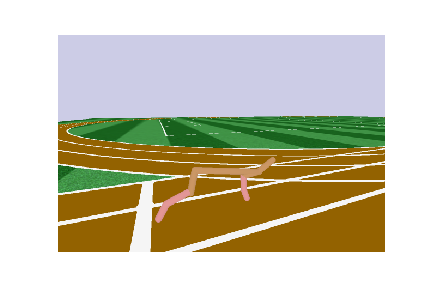
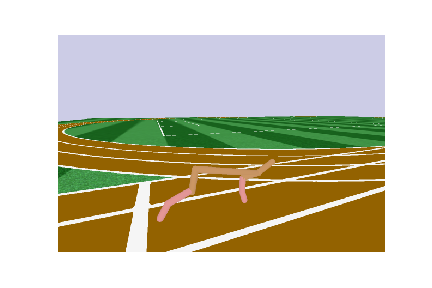
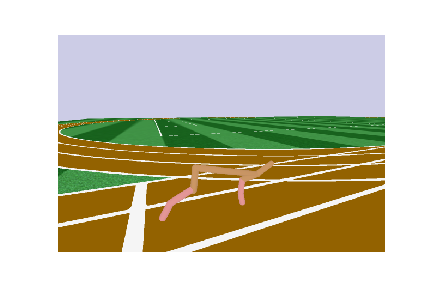
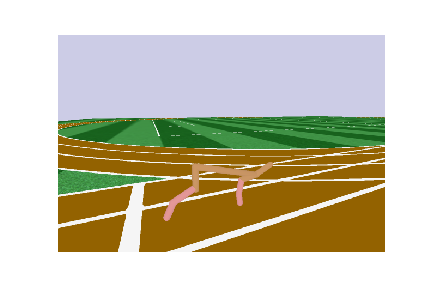
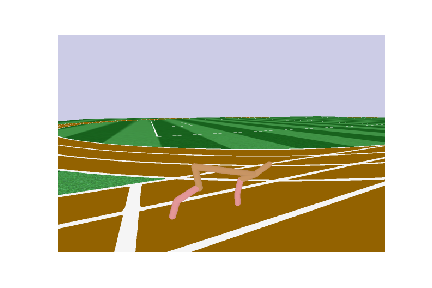
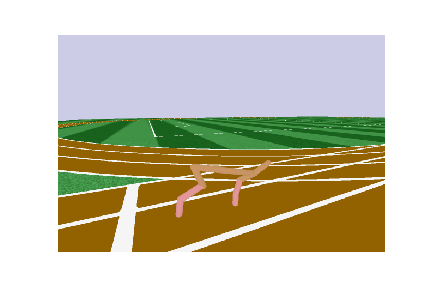
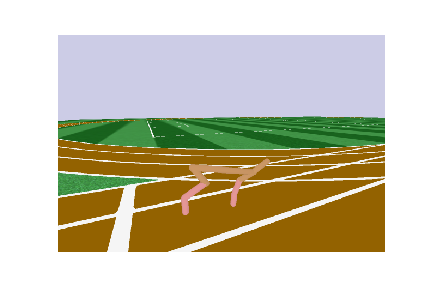
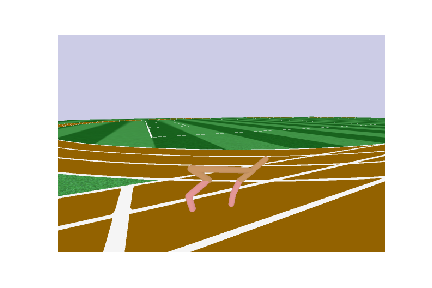
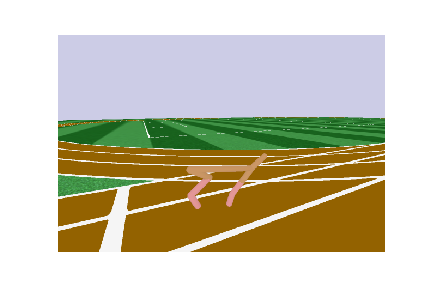
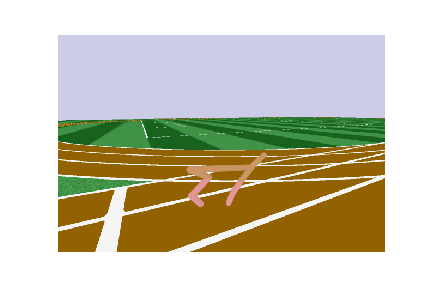
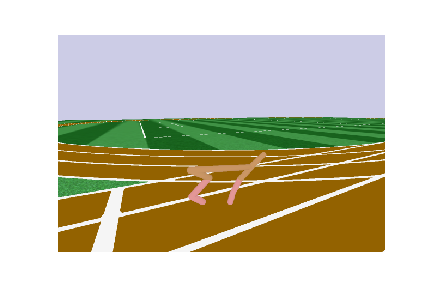
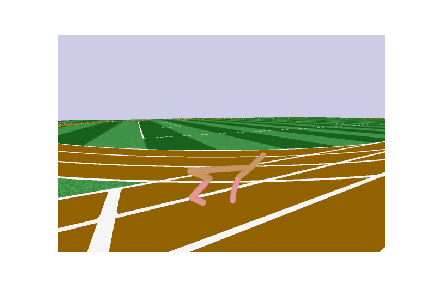
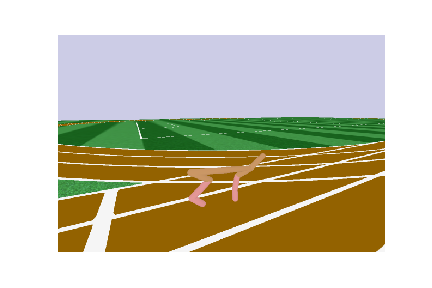
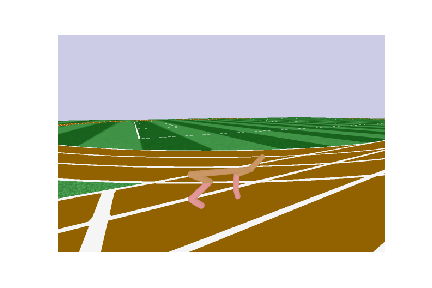
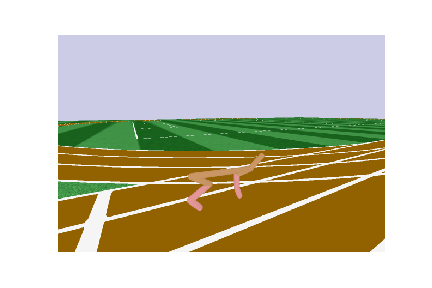
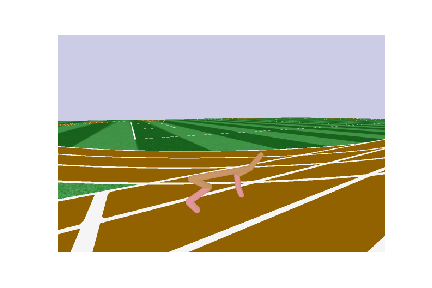
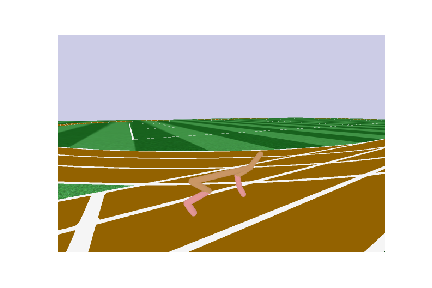
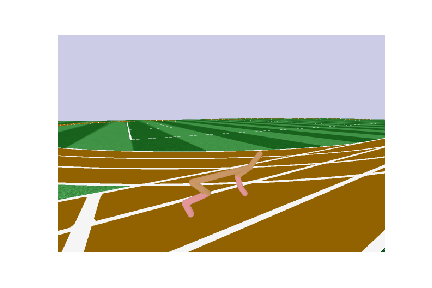

In [3]:
# Testing
display_frames_as_gif(frames)

In [4]:
# Loading a learner
noob = SupervisedPolicy(env)
env.reset()
observations, actions, rewards = run_rollouts(env, pi_expert, env.spec.timestep_limit, 20)

[-0.8744487   0.         -0.0581562   0.          0.04782487  0.
  1.1630473   0.          0.0899134   0.          0.9644656   0.        ]
[-1.1203742   0.         -0.01873733  0.          0.08794809  0.
  1.1350366   0.          0.02557359  0.          1.0020996   0.        ]
[nan nan nan nan nan nan nan nan nan nan nan nan]
~INF~ [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan  0.  0.  0.  0.  0.  0.]
[-1.0686532   0.          0.01859734  0.          0.09518332  0.
  1.0641683   0.          0.09041649  0.          1.0381328   0.        ]
[nan nan nan nan nan nan nan nan nan nan nan nan]
~INF~ [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan  0.  0.  0.  0.  0.  0.]
[-0.8110899   0.         -0.0990981   0.          0.05542529  0.
  1.1035534   0.         -0.02027572  0.          0.98618406  0.        ]
[nan nan nan nan nan nan nan nan nan nan nan nan]
~INF~ [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

/home/Tiberio/roboschool/roboschool/gym_forward_walker.py:51: RuntimeWarning: invalid value encountered in greater
  self.joints_at_limit = np.count_nonzero(np.abs(j[0::2]) > 0.99)
